Sanabila Khoirunnisa
1301204097

In [4]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import geoplot as gplt
import geopandas as gpd
import os
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [7]:
df = pd.read_csv("Indonesia_coronavirus_daily_data.csv")
df

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7
...,...,...,...,...,...,...,...,...,...,...
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950


In [8]:
Date_juni = df.query('Date == "2021-06-01"')
Date_juni

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
457,2021-06-01,DKI JAKARTA,519,11,509,-1,430538,412562,7169,10807
992,2021-06-01,JAWA BARAT,892,10,2039,-1157,314841,281318,4208,29315
1581,2021-06-01,JAWA TIMUR,225,24,208,-7,155006,141845,11421,1740
2110,2021-06-01,JAWA TENGAH,865,23,121,721,201795,180427,9405,11963
2628,2021-06-01,SULAWESI SELATAN,3,0,64,-61,62179,60865,946,368
3161,2021-06-01,BANTEN,119,1,30,88,49595,46781,1253,1561
3669,2021-06-01,NUSA TENGGARA BARAT,82,5,111,-34,12037,8920,447,2670
4195,2021-06-01,BALI,28,0,32,-4,47287,45176,1504,607
4710,2021-06-01,PAPUA,0,0,0,0,20461,11452,215,8794
5217,2021-06-01,KALIMANTAN SELATAN,43,2,41,0,34802,32927,1017,858


In [9]:
shapefile = os.path.abspath("BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp")
Id = gpd.read_file(shapefile)
Id.head()


,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."


In [10]:
df_merged = Id.set_index('PROVINSI').join(Date_juni.set_index('Province'))
df_merged.head()

,OBJECTID,Shape_Leng,Shape_Area,geometry,Date,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
PROVINSI,,,,,,,,,,,,,
ACEH,1,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97...",2021-06-01,122,1,120,1,15139,11931,598,2610
BALI,2,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",2021-06-01,28,0,32,-4,47287,45176,1504,607
BANTEN,3,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",2021-06-01,119,1,30,88,49595,46781,1253,1561
BENGKULU,4,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ...",2021-06-01,40,0,48,-8,8114,7196,180,738
DAERAH ISTIMEWA YOGYAKARTA,5,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",2021-06-01,219,9,178,32,44965,41618,1192,2155


In [11]:
df = df_merged.reset_index(level=['PROVINSI'])
df.head()

,PROVINSI,OBJECTID,Shape_Leng,Shape_Area,geometry,Date,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,ACEH,1,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97...",2021-06-01,122,1,120,1,15139,11931,598,2610
1,BALI,2,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",2021-06-01,28,0,32,-4,47287,45176,1504,607
2,BANTEN,3,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",2021-06-01,119,1,30,88,49595,46781,1253,1561
3,BENGKULU,4,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ...",2021-06-01,40,0,48,-8,8114,7196,180,738
4,DAERAH ISTIMEWA YOGYAKARTA,5,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",2021-06-01,219,9,178,32,44965,41618,1192,2155


In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PROVINSI                34 non-null     object  
 1   OBJECTID                34 non-null     int64   
 2   Shape_Leng              34 non-null     float64 
 3   Shape_Area              34 non-null     float64 
 4   geometry                34 non-null     geometry
 5   Date                    34 non-null     object  
 6   Daily_Case              34 non-null     int64   
 7   Daily_Death             34 non-null     int64   
 8   Daily_Recovered         34 non-null     int64   
 9   Active_Case             34 non-null     int64   
 10  Cumulative_Case         34 non-null     int64   
 11  Cumulative_Recovered    34 non-null     int64   
 12  Cumulative_Death        34 non-null     int64   
 13  Cumulative_Active_Case  34 non-null     int64   
dtypes: float64(2), geome

<Axes: >

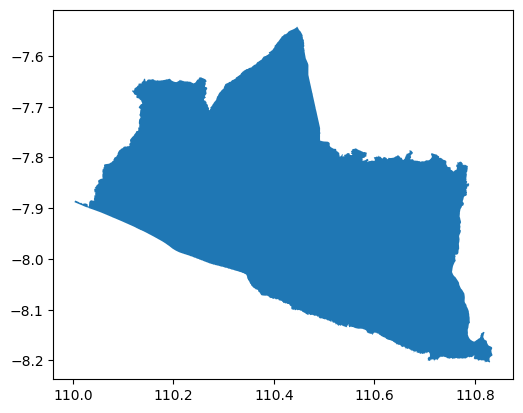

In [14]:
df[df.PROVINSI == "DAERAH ISTIMEWA YOGYAKARTA"].plot(aspect='auto')

<Axes: >

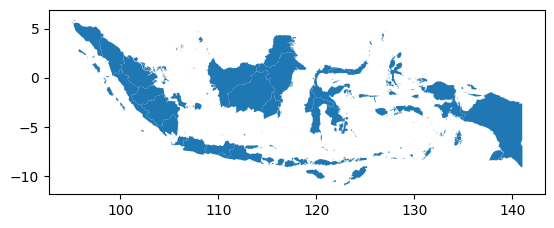

In [15]:
df.plot()